In [8]:
import os

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import requests

from graph_reinforcement_learning_using_blockchain_data import config

config.load_dotenv()


True

In [88]:
ALCHEMY_API_URL = os.getenv("ALCHEMY_API_URL")

In [90]:
df_arbs_q4_22 = pd.read_csv(config.EXTERNAL_DATA_DIR / "flashbots" / "Q4_2022" / "arbitrages.csv")
df_liqus_q4_22 = pd.read_csv(config.EXTERNAL_DATA_DIR / "flashbots" / "Q4_2022" / "liquidations.csv")
df_sand_swaps_q4_22 = pd.read_csv(config.EXTERNAL_DATA_DIR / "flashbots" / "Q4_2022" / "sandwiched_swaps.csv")
df_sand_q4_22 = pd.read_csv(config.EXTERNAL_DATA_DIR / "flashbots" / "Q4_2022" / "sandwiches.csv")

# Arbitrages

In [7]:
df_arbs_q4_22.head()

,id,created_at,account_address,profit_token_address,block_number,transaction_hash,start_amount,end_amount,profit_amount,error,protocols
0,917c98d5-3436-42b1-8d9d-f10f945487a8,2022-11-16T12:40:18.771837,0x25f12db13b19bc9e000f0070a2efbf8353dd8a65,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,15537394,0x7e6735c14377af079e148458b4e10e8a0e061c3d0e85...,12124141546838233327,12172437093914914180,48295547076680853,NaN,{uniswap_v3}
1,106a3207-2d72-4eb4-a81a-511a213eac13,2022-11-16T12:40:18.771837,0x00000000c2cf7648c169b25ef1c217864bfa38cc,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,15537398,0xc2c0b598e33a11a594d80f7bb47b7f7608b4de48e075...,352000000000000000000,352954508979737626918,954508979737626918,NaN,{uniswap_v3}
2,0b8d6bb8-57d7-45ce-b812-f4f5257d68ae,2022-11-16T12:40:18.771837,0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,15537398,0xdfd59e6a09b7735063ff13d3ea84add9a82f7bc33da0...,39173715987829080000,39353342973717013665,179626985887933665,NaN,{uniswap_v3}
3,c297aef4-6585-43dc-b2ce-6b9edfc57a3b,2022-11-16T12:40:20.741692,0xeeaa83b2d581a3a790774d4dae7bf354fffe3376,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,15537408,0xc4fb48b2565e5b7ea14082f6eb649aad8ad8ddc759ac...,38204493757247345559,38335421469841796565,130927712594451006,Reverted,"{uniswap_v2,uniswap_v3}"
4,4a01aeda-34a5-4989-a033-4219f2113d7e,2022-11-16T12:40:17.788174,0xbadc0defafcf6d4239bdf0b66da4d7bd36fcf05a,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,15537419,0x8d014fa033545a23133808b93b2c713088379a9b84d4...,90059393310717330000,90274513361866126368,215120051148796368,NaN,{uniswap_v3}


- account_address: The address of the MEV-bot
- profit_token_address: Token used for profit payout

# Liquidations

In [8]:
df_liqus_q4_22.head()

,created_at,liquidated_user,liquidator_user,debt_token_address,debt_purchase_amount,received_amount,protocol,transaction_hash,trace_address,block_number,received_token_address,error
0,2022-11-28T02:48:59.683105,0x95c024458a63ec1592c0b12970e67056ae416dd6,0xc2a54f74ebbbba5ed92d6a0b5dcb0b0ffb96f36e,0x4fabb145d64652a948d72533023f6e7a623c7c53,3148658446508831208420,16875494,aave,0x3203a6ed1299f1ef82652d3f9522df41714f8a37add5...,"{3,0,3,11}",15539761,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,NaN
1,2022-11-28T02:48:59.683105,0xed303bd83474a4337cbdee2b954e64aaf00bd2cc,0xabcf5d4be599f1c7f71fcbcae4643a2aa849f4c8,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,55973752331,38678547655198028502,aave,0xcc4b35cdfdb1e6612964b088a14f43a3f5a967c837fb...,"{3,1,6}",15539761,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,NaN
2,2022-11-28T02:48:59.683105,0xb532cfadbe308a75d2fdfdc6de28a0cfe0dbb70d,0xd911560979b78821d7b045c79e36e9cbfc2f6c6f,0x6b175474e89094c44da98b954eedeac495271d0f,1391911910281205537152,574728109851614222484,aave,0x97e0bc9e929cf11a8706feae9734171d9e64a923ee26...,{2},15539762,0x35f6b052c598d933d69a4eec4d04c73a191fe6c2,NaN
3,2022-11-28T02:48:59.683105,0x2bff7d6e40dc4afb0ad065593558bde0042c4c3b,0xd911560979b78821d7b045c79e36e9cbfc2f6c6f,0x6b175474e89094c44da98b954eedeac495271d0f,1163345598528830476923,1209879422469983695999,aave,0xc8a8d42fb7a5e73c8ad3169653295454fdcc6f366b52...,{2},15539765,0x028171bca77440897b824ca71d1c56cac55b68a3,NaN
4,2022-11-28T02:49:09.26998,0x00159370cbe576b765a7fb2e78582e0cb563d445,0xd911560979b78821d7b045c79e36e9cbfc2f6c6f,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2560805909,1769548212548780857,aave,0x5b01da54507f1535773e4b244941b59875f11fa09f0f...,{2},15539770,0x030ba81f1c18d280636f32af80b9aad02cf0854e,NaN


- liquidated_user: Address of user that was liquidated
- liquidator_user: MEV-bot
- debt_token_address: Debt token that was liquidated
- debt_purchase_amount: Debt to cover
- received_amount: Reward payed out to MEV-bot
- trace_address: Specifies the trace in which the call for the liquidation happens ([traces](https://docs.alchemy.com/reference/what-are-evm-traces))
- received_token_address: Token used for reward payout to MEV-bot

# Sandwiched Swaps

Sandwiches swaps just show general swaps that were sandwiched, without specifying more details about the MEV-bot etc. See sandwiches for more detailed transactions.

In [9]:
df_sand_swaps_q4_22.head()

,created_at,sandwich_id,block_number,transaction_hash,trace_address
0,2022-11-16T12:40:22.366935,8a46d53b-24ea-4865-9b3c-aa7192d7cc66,15537423,0x8127a5a52bdbd3b013e7174eb97590a8498124daae87...,"{0,1,2,1,4,1,13,1}"
1,2022-11-16T12:40:54.132163,106d068c-4730-48ee-aabe-c095c33327ac,15537465,0x41fc820ccc29b54df36ec7c68eee93e474d13c2ec5be...,{2}
2,2022-11-16T12:40:58.355398,15b6a791-b806-4867-a3a5-99486d3871b6,15537485,0xca5289c33a937175cd93f3f5cfd0a6c58d51e5eed29a...,"{0,4}"
3,2022-11-16T12:41:34.83599,1a5d1e2f-7e33-488f-b01d-4a969707d0e9,15537535,0xacc1f2073c52bf0a0662a883c195280a41cb2c254c46...,"{1,0,1,2}"
4,2022-11-16T12:42:20.160351,c364a350-afc7-4d07-86a9-dd10c578b8fe,15537577,0xeeb4d72e5f9fabc43d8a92ce86fcc394bf18f4341af4...,{0}


- trace_address: Specifies the trace in which the victims call for the swap happens 

# Sandwiches

In [10]:
df_sand_q4_22.head()

,id,created_at,block_number,sandwicher_address,frontrun_swap_transaction_hash,frontrun_swap_trace_address,backrun_swap_transaction_hash,backrun_swap_trace_address,profit_token_address,profit_amount
0,8a46d53b-24ea-4865-9b3c-aa7192d7cc66,2022-11-16T12:40:22.366935,15537423,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0xac36fdda06a83f50fe3ae6524b3cc6c4d6be304c5d77...,"{0,2,0,1}",0xa680a06e2147216542c4c72531c7069ad2a04c9a04da...,"{0,1,0,1}",0xdac17f958d2ee523a2206206994597c13d831ec7,-33209999495
1,106d068c-4730-48ee-aabe-c095c33327ac,2022-11-16T12:40:54.132163,15537465,0x1082127211bda2f0ed1a3d50a1ab5d0d5895957b,0xa0810c002e0f5ce98d32519fda059ccff1d80d5874d2...,{2},0x8f30f24cb7d171a1dbcd4b00bf5fa485318e4d895411...,{3},0x0f2d719407fdbeff09d87557abb7232601fd9f29,0
2,15b6a791-b806-4867-a3a5-99486d3871b6,2022-11-16T12:40:58.355398,15537485,0x1082127211bda2f0ed1a3d50a1ab5d0d5895957b,0x335f9bda7db4b429f6110085a4012a6f9cfd5aeb0aa9...,{2},0xd6a824c40d563b66559cce9d21fe6d365c51f803d0b9...,{3},0xfd40f029d1acb0fcf615d4bfabc69da90d08cb3c,0
3,1a5d1e2f-7e33-488f-b01d-4a969707d0e9,2022-11-16T12:41:34.83599,15537535,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0x4a63604eb05d0198ce0183223325f62c550a588ed910...,"{1,0,1,0,2}",0x99270a939b4f27f977474058a18e752618f6baa11a26...,"{0,0,0,0,3}",0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,-715129270
4,c364a350-afc7-4d07-86a9-dd10c578b8fe,2022-11-16T12:42:20.160351,15537577,0x1111111254fb6c44bac0bed2854e76f90643097d,0xa9be3190617f30feb6fd9b77ca7b9b1050d66222807e...,{1},0x7ccf5aeb6c46d52d4375253242be1d6fecd90a55b69a...,{1},0xdac17f958d2ee523a2206206994597c13d831ec7,-13352113048


- sandwicher_address: MEV-bot
- frontrun_swap_trace_address: Trace in which the frontrun swap by the MEV-bot happens
- backrun_swap_trace_address: Trace in which the backrun swap by the MEV-bot happens
- profit_token_address: Token used for profit payout

In [61]:
block = hex(15537398)
payload = {
    "id": 1,
    "jsonrpc": "2.0",
    "method": "eth_getBlockByNumber",
    "params": [block, True]
}
headers = {
    "accept": "application/json",
    "content-type": "application/json"
}

response = requests.post(ALCHEMY_API_URL, json=payload, headers=headers)

print(response.text)

{"jsonrpc":"2.0","id":1,"result":{"number":"0xed14f6","hash":"0xb21c38c1c3ee6ae142fa03ae2671db768da478f03bd777537908f79a29b6b3da","transactions":[{"blockHash":"0xb21c38c1c3ee6ae142fa03ae2671db768da478f03bd777537908f79a29b6b3da","blockNumber":"0xed14f6","hash":"0x574604cc28929a5f1997ecbe4900d2e00915b896a3b7e2308f2a858200e4abb0","accessList":[],"transactionIndex":"0x0","type":"0x2","nonce":"0x57","input":"0x1249c58b","r":"0xfec2a397d8f15842223b074e5776e4c7ddc4945bd2f8542c4768edc00c31c9e2","s":"0x8c7c1333ef85a4d843eda669e28941952230492718b1c3e67b3545c09a46fcb","chainId":"0x1","v":"0x0","gas":"0x30d40","maxPriorityFeePerGas":"0x746a528800","from":"0x5cfb4f2f03f258864cc30b5c457f5f84c665cfad","to":"0xfc1726c4ead2393fa14407ff54b336e2c8bb4aca","maxFeePerGas":"0x746a528800","value":"0x0","gasPrice":"0x746a528800"},{"blockHash":"0xb21c38c1c3ee6ae142fa03ae2671db768da478f03bd777537908f79a29b6b3da","blockNumber":"0xed14f6","hash":"0xfe241fb4d75a51c9c1b20d7a1c46fc0523f393edf75b6cd9b931617cc5648c8e",

# Graph with data from accessible trough transaction receipt

None cannot be a node - txHash:
0xf27b7e6c64f4b2911609e1cbee88b0fa6115b239b861470e4a3ef48a2f201f8c
None cannot be a node - txHash:
0xd2c9bd689bf678e95fd817daa2324b980f78c2b9c5d486d9500e39bd7c8e9a85


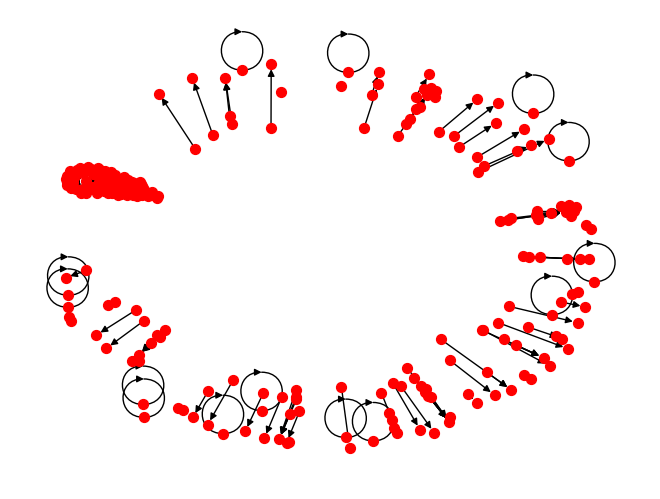

In [64]:
G = nx.DiGraph()

for tx in response.json()["result"]["transactions"]:
    from_addr = tx["from"]
    to_addr = tx["to"]
    tx_hash = tx["hash"]
    try:
        G.add_edge(from_addr, to_addr, tx_hash=tx_hash)
    except ValueError as e:
        print(f"{e} - txHash:\n{tx_hash}")

pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=False, node_size=50, node_color="red", arrowsize=10)


Creating a subgraph with nodes that have a degree greater than 1 and their neighbors.

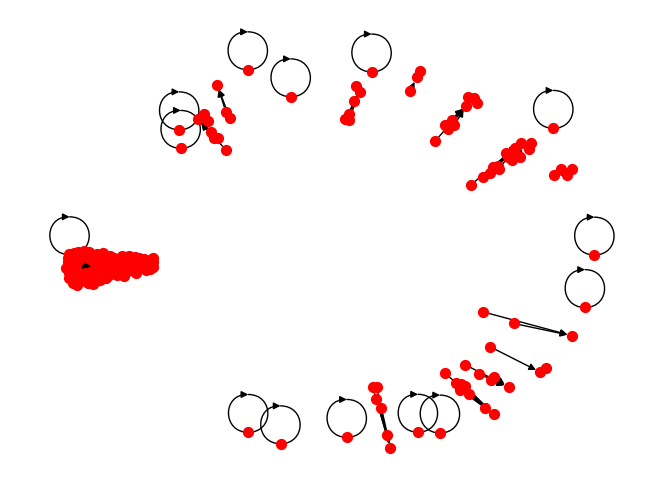

In [82]:
nodes_deg_gt_1 = {n for n in G.nodes if G.degree(n) > 1}

neighbors = set()
for node in nodes_deg_gt_1:
    neighbors |= set(G.successors(node))
    neighbors |= set(G.predecessors(node))

nodes_to_include = nodes_deg_gt_1 | neighbors
G_sub = G.subgraph(nodes_to_include)

pos = nx.spring_layout(G_sub, seed=42)

nx.draw(G_sub, pos, with_labels=False, font_size=6, node_size=50, node_color="red", arrowsize=10)


Only looking at one MEV-bot node:

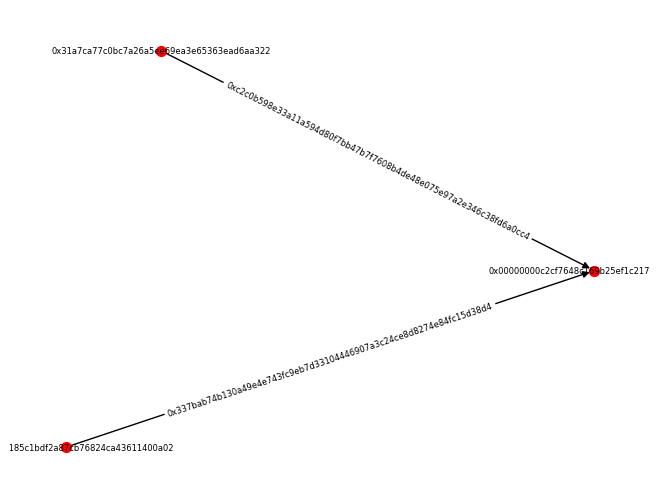

In [87]:
mev_bot = "0x00000000c2cf7648c169b25ef1c217864bfa38cc"
node_mev_bot = {n for n in G.nodes if n == mev_bot}

neighbors = set()
for node in node_mev_bot:
    neighbors |= set(G.successors(node))
    neighbors |= set(G.predecessors(node))

nodes_to_include = node_mev_bot | neighbors
G_sub_mev = G.subgraph(nodes_to_include)

pos = nx.spring_layout(G_sub_mev, seed=42)
nx.draw(G_sub_mev, pos, with_labels=True, font_size=6, node_size=50, node_color="red", arrowsize=10)
edge_labels = nx.get_edge_attributes(G_sub_mev, "tx_hash")
nx.draw_networkx_edge_labels(G_sub_mev, pos, edge_labels=edge_labels, font_size=6)

plt.show()

Problem: We are not including traces, so we are missing out on relevant information for MEV.

# Trace Analysis

In [96]:
df_traces_221116 = pd.read_parquet(config.EXTERNAL_DATA_DIR / "aws_public_blockchain_dataset" / "part-00000-399e518a-e4c6-43b8-b1cc-db85fd791506-c000.snappy.parquet")

In [97]:
df_traces_221116.head()

,block_number,transaction_hash,transaction_index,error,status,trace_id,subtraces,trace_address,block_hash,trace_type,...,from_address,value,reward_type,input,output,call_type,to_address,block_timestamp,date,last_modified
0,15983077,0x410d6998e559ee12311d2194ffa6155ba1f2b616ee8b...,0,None,1,call_0x410d6998e559ee12311d2194ffa6155ba1f2b61...,1,None,0xbab2b7b3f34cca0ce30f1bcd98f17db23202be25e3a0...,call,...,0xe2ca3167b89b8cf680d63b06e8aeefc5e4ebe907,0.000000e+00,None,0x006374ee9b1e4b5ab61593a2401b1075b90c04cbcdd3...,0x,call,0xe8c060f8052e07423f71d445277c61ac5138a2e5,2022-11-16 14:07:23,2022-11-16,2022-11-17 01:02:01.538152
1,15983077,0xc5a08114f327d5fdc04bc33ecdb7440b99f1be3f3ba2...,1,None,1,call_0xc5a08114f327d5fdc04bc33ecdb7440b99f1be3...,1,None,0xbab2b7b3f34cca0ce30f1bcd98f17db23202be25e3a0...,call,...,0x1c8f6a5f009e051cab9c3851ca2da2c936b2775a,3.200100e+04,None,0x1cff79cd00000000000000000000000088b496d62b9e...,0x,call,0xa69babef1ca67a37ffaf7a485dfff3382056e78c,2022-11-16 14:07:23,2022-11-16,2022-11-17 01:02:01.538170
2,15983077,0x3ed40d1fda1a3e34d8158e6ec62a39d3425ceac1e07e...,2,None,1,call_0x3ed40d1fda1a3e34d8158e6ec62a39d3425ceac...,2,None,0xbab2b7b3f34cca0ce30f1bcd98f17db23202be25e3a0...,call,...,0xe2ca3167b89b8cf680d63b06e8aeefc5e4ebe907,8.381447e+16,None,0x016374ee9b1e4b5ab61593a2401b1075b90c04cbcdd3...,0x,call,0xe8c060f8052e07423f71d445277c61ac5138a2e5,2022-11-16 14:07:23,2022-11-16,2022-11-17 01:02:01.538180
3,15983077,0x5298c98e257a0ada3c6023533a0eff66415029b25eec...,3,None,1,call_0x5298c98e257a0ada3c6023533a0eff66415029b...,1,None,0xbab2b7b3f34cca0ce30f1bcd98f17db23202be25e3a0...,call,...,0x474a6faf2178982be06028f0e1256af98910d9be,1.598308e+07,None,0x3300000000088815071ece995bb0000000000000002c...,0x,call,0x9507c04b10486547584c37bcbd931b2a4fee9a41,2022-11-16 14:07:23,2022-11-16,2022-11-17 01:02:01.538188
4,15983077,0x7bd744315e45703c4c855699dc8646b587e4e06e520f...,4,None,1,call_0x7bd744315e45703c4c855699dc8646b587e4e06...,1,None,0xbab2b7b3f34cca0ce30f1bcd98f17db23202be25e3a0...,call,...,0x98550391ea2af72265579684e5a3578e7c57ab6a,0.000000e+00,None,0x1e1326a3000000000000000000000000c2e9f25be625...,0x,call,0x0087bb802d9c0e343f00510000729031ce00bf27,2022-11-16 14:07:23,2022-11-16,2022-11-17 01:02:01.538196


In [95]:
df_traces_221116_block = df_traces_221116[df_traces_221116["block_number"] == 15537398]
df_traces_221116

,block_number,transaction_hash,transaction_index,error,status,trace_id,subtraces,trace_address,block_hash,trace_type,...,from_address,value,reward_type,input,output,call_type,to_address,block_timestamp,date,last_modified


In [ ]:
from dagshub.streaming import DagsHubFilesystem

fs = DagsHubFilesystem(".", repo_url="https://dagshub.com/DagsHub-Datasets/aws-public-blockchain-dataset")


In [21]:
fs.listdir("s3://aws-public-blockchain/v1.0/eth/traces/date=2022-09-15/")

['part-00000-382d573f-99a4-4e44-9136-312a0b318b3b-c000.snappy.parquet']

In [22]:
url = "https://dagshub.com/DagsHub-Datasets/aws-public-blockchain-dataset/raw/36dac4668a5f807f075a295784127e8445f23ded/s3:/aws-public-blockchain/v1.0/eth/traces/date=2022-09-15/part-00000-382d573f-99a4-4e44-9136-312a0b318b3b-c000.snappy.parquet"
local_filename = config.EXTERNAL_DATA_DIR / "aws_public_blockchain_dataset" / "traces_2022-09-15.snappy.parquet"

with requests.get(url, stream=True) as response:
    response.raise_for_status()
    with open(local_filename, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)

In [23]:
df_traces_220915 = pd.read_parquet(local_filename)

In [24]:
df_traces_220915.head()

,block_number,transaction_hash,transaction_index,error,status,trace_id,subtraces,trace_address,block_hash,trace_type,...,from_address,value,reward_type,input,output,call_type,to_address,block_timestamp,date,last_modified
0,15540406,0x5f66232aea6bd6a3428106049305d93b9b7782a59923...,0.0,None,1,call_0x5f66232aea6bd6a3428106049305d93b9b7782a...,0,None,0x39886e73b8a0704274c438d69b65729321713295abf0...,call,...,0xc098b2a3aa256d2140208c3de6543aaef5cd3a94,5.579860e+15,None,0x,0x,call,0x02483ab68430f0bf6bbf073e5e8111671fe6902c,2022-09-15 16:53:59,2022-09-15,2022-09-24 22:10:14.821824
1,15540406,0x678856e2cf7119e42ac59a3f1c2f310c253ac20bdc4e...,1.0,None,1,call_0x678856e2cf7119e42ac59a3f1c2f310c253ac20...,0,None,0x39886e73b8a0704274c438d69b65729321713295abf0...,call,...,0xc730b028da66ebb14f20e67c68dd809fbc49890d,1.048971e+17,None,0x,0x,call,0x0ea0affbe3481cf4b9df076db5c9b38ad194d2ac,2022-09-15 16:53:59,2022-09-15,2022-09-24 22:10:14.821841
2,15540406,0x3c19a6cd272e0f6853f43c54bf8f436e14a0c21acdee...,2.0,Reverted,0,call_0x3c19a6cd272e0f6853f43c54bf8f436e14a0c21...,1,None,0x39886e73b8a0704274c438d69b65729321713295abf0...,call,...,0xe628f1564d834850427e16f8184769c51eee037d,2.400000e+16,None,0xfb0f3ee1000000000000000000000000000000000000...,0xee9e0e63f9c213c56a26c373724f84f9f2ab8c7149ef...,call,0x00000000006c3852cbef3e08e8df289169ede581,2022-09-15 16:53:59,2022-09-15,2022-09-24 22:10:14.821849
3,15540406,0x0596cdc660dff59c406d096f751f2796519e19687265...,3.0,None,1,call_0x0596cdc660dff59c406d096f751f2796519e196...,0,None,0x39886e73b8a0704274c438d69b65729321713295abf0...,call,...,0x98db3a41bf8bf4ded2c92a84ec0705689ddeef8b,1.621442e+17,None,0x,0x,call,0x8b0cdb6efa3d84012629062bd79bcbdc052dbd8f,2022-09-15 16:53:59,2022-09-15,2022-09-24 22:10:14.821858
4,15540406,0xfe2587453fcd2e3cfab06e811a57073b7f97a00f8a9d...,4.0,None,1,call_0xfe2587453fcd2e3cfab06e811a57073b7f97a00...,0,None,0x39886e73b8a0704274c438d69b65729321713295abf0...,call,...,0xeeb3f45eceaeea0adaec1375984f45efdc1e0f39,5.000000e+16,None,0x,0x,call,0x904ef964b0caf172d0d99c31c8e2f812de659b1f,2022-09-15 16:53:59,2022-09-15,2022-09-24 22:10:14.821865


In [26]:
df_traces_filtered = df_traces_220915[df_traces_220915["transaction_hash"] == "0xc2c0b598e33a11a594d80f7bb47b7f7608b4de48e075e97a2e346c38fd6a0cc4"]
df_traces_filtered

,block_number,transaction_hash,transaction_index,error,status,trace_id,subtraces,trace_address,block_hash,trace_type,...,from_address,value,reward_type,input,output,call_type,to_address,block_timestamp,date,last_modified
443518,15537398,0xc2c0b598e33a11a594d80f7bb47b7f7608b4de48e075...,4.0,None,1,call_0xc2c0b598e33a11a594d80f7bb47b7f7608b4de4...,6,None,0xb21c38c1c3ee6ae142fa03ae2671db768da478f03bd7...,call,...,0x31a7ca77c0bc7a26a5ee69ea3e65363ead6aa322,0.0,None,0x000000ff000000000000000000000000000000000000...,0x,call,0x00000000c2cf7648c169b25ef1c217864bfa38cc,2022-09-15 06:43:47,2022-09-15,2022-09-24 21:47:18.920378
443727,15537398,0xc2c0b598e33a11a594d80f7bb47b7f7608b4de48e075...,4.0,None,1,call_0xc2c0b598e33a11a594d80f7bb47b7f7608b4de4...,0,0,0xb21c38c1c3ee6ae142fa03ae2671db768da478f03bd7...,call,...,0x00000000c2cf7648c169b25ef1c217864bfa38cc,0.0,None,0x3850c7bd,0x00000000000000000000000000000000000061502685...,staticcall,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,2022-09-15 06:43:47,2022-09-15,2022-09-24 21:47:18.921942
443728,15537398,0xc2c0b598e33a11a594d80f7bb47b7f7608b4de48e075...,4.0,None,0,call_0xc2c0b598e33a11a594d80f7bb47b7f7608b4de4...,0,1,0xb21c38c1c3ee6ae142fa03ae2671db768da478f03bd7...,call,...,0x00000000c2cf7648c169b25ef1c217864bfa38cc,0.0,None,0x3850c7bd,0x00000000000000000000000000000000000061be6885...,staticcall,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,2022-09-15 06:43:47,2022-09-15,2022-09-24 21:47:18.921950
443729,15537398,0xc2c0b598e33a11a594d80f7bb47b7f7608b4de48e075...,4.0,None,1,call_0xc2c0b598e33a11a594d80f7bb47b7f7608b4de4...,0,2,0xb21c38c1c3ee6ae142fa03ae2671db768da478f03bd7...,call,...,0x00000000c2cf7648c169b25ef1c217864bfa38cc,0.0,None,0x70a0823100000000000000000000000000000000c2cf...,0x00000000000000000000000000000000000000000000...,staticcall,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2022-09-15 06:43:47,2022-09-15,2022-09-24 21:47:18.921959
443730,15537398,0xc2c0b598e33a11a594d80f7bb47b7f7608b4de48e075...,4.0,None,1,call_0xc2c0b598e33a11a594d80f7bb47b7f7608b4de4...,4,3,0xb21c38c1c3ee6ae142fa03ae2671db768da478f03bd7...,call,...,0x00000000c2cf7648c169b25ef1c217864bfa38cc,0.0,None,0x128acb0800000000000000000000000000000000c2cf...,0xffffffffffffffffffffffffffffffffffffffffffff...,call,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,2022-09-15 06:43:47,2022-09-15,2022-09-24 21:47:18.921967
443731,15537398,0xc2c0b598e33a11a594d80f7bb47b7f7608b4de48e075...,4.0,None,1,call_0xc2c0b598e33a11a594d80f7bb47b7f7608b4de4...,4,4,0xb21c38c1c3ee6ae142fa03ae2671db768da478f03bd7...,call,...,0x00000000c2cf7648c169b25ef1c217864bfa38cc,0.0,None,0x128acb0800000000000000000000000000000000c2cf...,0x00000000000000000000000000000000000000000000...,call,0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8,2022-09-15 06:43:47,2022-09-15,2022-09-24 21:47:18.921976
443732,15537398,0xc2c0b598e33a11a594d80f7bb47b7f7608b4de48e075...,4.0,None,1,call_0xc2c0b598e33a11a594d80f7bb47b7f7608b4de4...,0,5,0xb21c38c1c3ee6ae142fa03ae2671db768da478f03bd7...,call,...,0x00000000c2cf7648c169b25ef1c217864bfa38cc,0.0,None,0x70a0823100000000000000000000000000000000c2cf...,0x00000000000000000000000000000000000000000000...,staticcall,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2022-09-15 06:43:47,2022-09-15,2022-09-24 21:47:18.921985
443853,15537398,0xc2c0b598e33a11a594d80f7bb47b7f7608b4de48e075...,4.0,None,1,call_0xc2c0b598e33a11a594d80f7bb47b7f7608b4de4...,1,"3,0",0xb21c38c1c3ee6ae142fa03ae2671db768da478f03bd7...,call,...,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0.0,None,0xa9059cbb00000000000000000000000000000000c2cf...,0x00000000000000000000000000000000000000000000...,call,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-15 06:43:47,2022-09-15,2022-09-24 21:47:18.923011
443854,15537398,0xc2c0b598e33a11a594d80f7bb47b7f7608b4de48e075...,4.0,None,1,call_0xc2c0b598e33a11a594d80f7bb47b7f7608b4de4...,0,"3,1",0xb21c38c1c3ee6ae142fa03ae2671db768da478f03bd7...,call,...,0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640,0.0,None,0x70a0823100000000000000000000000088e6a0c2d

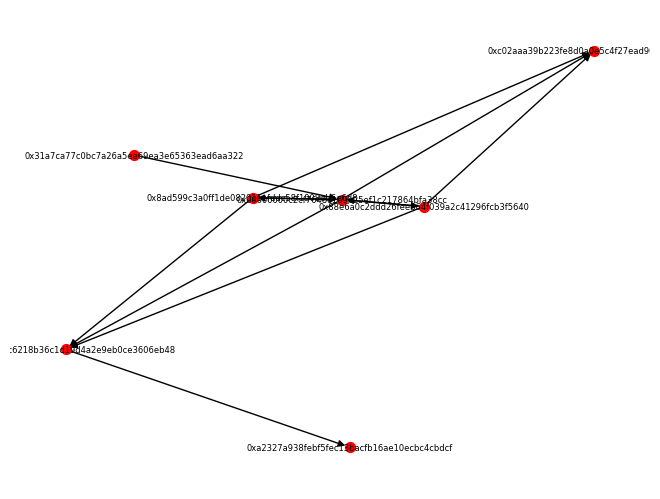

In [32]:
G = nx.DiGraph()

for _, tx in df_traces_filtered.iterrows():
    from_addr = tx["from_address"]
    to_addr = tx["to_address"]
    tx_hash = tx["transaction_hash"]
    try:
        G.add_edge(from_addr, to_addr, tx_hash=tx_hash)
    except ValueError as e:
        print(f"{e} - txHash:\n{tx_hash}")

pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=True, font_size=6, node_size=50, node_color="red", arrowsize=10)
